<a href="https://colab.research.google.com/github/huskeypm/cellmigration/blob/main/conda_openmm_pytraj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# brownian example
This notebook demonstrates the cell simulator using google colab.

A recentish copy can be found in ./examples

## Setup
Enable cuda runtime first before starting session

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:11
🔁 Restarting kernel...


In [2]:
!conda install -c conda-forge openmm ambertools=23

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 

Check that installation was successful

In [1]:
import openmm
import pytraj


Check that cuda is available (otherwise check at beginning the appropriate session was established)

In [2]:
import openmm as mm

platform = mm.Platform.getPlatformByName('CUDA')
properties = {'Precision': 'double'}

In [3]:
import matplotlib.pylab as plt
import numpy as np


CHeck out the cellmigration repo

In [6]:
!git clone https://github.com/huskeypm/cellmigration.git


Cloning into 'cellmigration'...
remote: Enumerating objects: 585, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 585 (delta 40), reused 36 (delta 19), pack-reused 510
Receiving objects: 100% (585/585), 10.37 MiB | 22.31 MiB/s, done.
Resolving deltas: 100% (377/377), done.


In [7]:
cd cellmigration

/content/cellmigration


Import model. Note, the version will likely keep incrementing higher, so check back for updates

In [8]:
import brownian_v4 as b4

Linux


## Simulate

Execute the simulator using a user-written yaml file. For more instructions on this, check out the readme in the repo

https://github.com/huskeypm/cellmigration/blob/main/tests/README.md



In [9]:
dummy = b4.runBD(display=None, yamlFile="tests/effrad.yaml")

Adding nCells= 20
Adding cellRad= 10
Adding cellAttr= 1.0
Adding domainXDim= 140
Adding domainYDim= 100
Adding nCrowders= 9
Adding crowderRad= 25
Adding crowderDim= 100
Adding crowderAttr= 1.0
Adding effectiveRad= 10
Adding nUpdates= 1000
Adding friction= 100
Adding containmentPotential= square
Adding xPotential= False
Adding xScale= 0.1
Adding yPotential= False
Adding outName= crowder
None
TODO try removing
ADD ME
adding square containment potential
100.0 * z^2+ 0.0 * exp(-(y - -50.0)/25.)+ 0.0 * (x - -70.0)^1   +10*(max(0, -70.0-x) + max(0, x-70.0) + max(0, -50.0-y) + max(0, y-50.0));
Minimizing system
If stalls, there's probably a big clash somewhere
Running dynamics
(1/10)...
(2/10)...
(3/10)...
(4/10)...
(5/10)...
(6/10)...
(7/10)...
(8/10)...
(9/10)...
(10/10)...
Time(s):  4


## Analyze

Firstly, you can visualize the results in vmd, by downloading the vmd visualizer from https://www.ks.uiuc.edu/Development/Download/download.cgi?PackageName=VMD

You will also see a crowder.pdb and crowder.dcd dataset in ./cellmigration/ - download these and open with vmd

In [12]:
outputData = 'crowder'

We could also analyze data inside the notebook.

Load libraries for analyzing data

In [13]:
import brown_util as bu
import pytraj as pt

In [14]:
traj = bu.LoadTraj(outputData)

Loaded crowder.dcd


### Plot 2D trajectories

store the x and y coordinates of all particles with the mask @RC (the moving particles)

In [15]:
mask = "@RC"
indices = pt.select_atoms(traj.top, mask)
xs = traj.xyz[0:,indices,0]
ys = traj.xyz[0:,indices,1]



Plot their trajectories

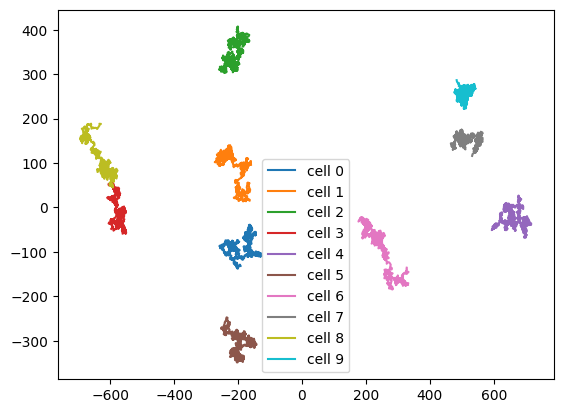

In [16]:
nCells = np.shape(xs)[1]

plotCells = int(nCells/2) # just plotting five for now
for i in range(plotCells):
  plt.plot(xs[:,i],ys[:,i],label="cell %d"%i)

plt.legend(loc=0)

### compute the diffusion coefficient

In [17]:
Di=bu.CalcD(traj,mask='@RC') # ,display=True) # this will be fixed momentarily

In [18]:
print("Diff coefficient is ",Di)

Diff coefficient is  0.20849860303816847


### plot histogram of particle positions.
These are the areas (top) and relative energies (bottom) of the regions that the particles sampled

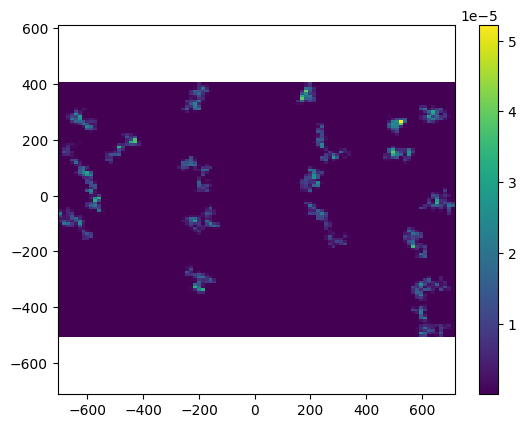

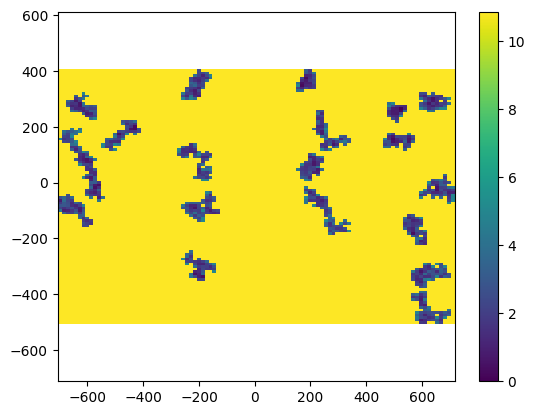

In [19]:
  dummy = bu.CalcProbDist(traj,mask='@RC',display=True)

## More tips
- See the README.md files for more tips on configuring simulations using yaml files
- Use pytraj documention to perform additional analyses (https://amber-md.github.io/pytraj/latest/index.html)